# **Grid Search CV** For Model optimization

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
df = pd.read_csv('/content/pima-indians-diabetes.csv')
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
X = df.drop('class',axis=1)
y=df['class']

# Divide your data into three(3) parts: Training, Validation and Testing data.

In [5]:
#save 20% of your dataset for final testing
# use 80% for training and validation process

# STEPS:
  #1. first divide our dataset into 80:20 (i.e. training(80) and testing(20))
  #2. next divide the 80 part to training and validation (i.e. whatever ratio you prefer)


X_train1, X_test, y_train1,y_test = train_test_split(X,y, test_size=.20,random_state=1)


X_train2, X_val, y_train2,y_val = train_test_split(X_train1,y_train1, test_size=.25,random_state=1)

In [6]:
print('Total dataset',len(X.values))
print('Total test data saved for future use: ',len(X_test+y_test))
print('Total training data: ',len(X_train2+y_train2))
print('Total validation data: ',len(X_val+y_val))

Total dataset 768
Total test data saved for future use:  154
Total training data:  460
Total validation data:  154


In [7]:
154+460+154

768

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()


In [9]:
knn_clf.fit(X_train2,y_train2)

KNeighborsClassifier()

In [10]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [11]:
param_grid = {'n_neighbors':list(range(1,9)),
               'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')
               
                }

In [12]:
from sklearn.model_selection import GridSearchCV

gs=GridSearchCV(knn_clf,param_grid,cv=20)


In [13]:
gs.fit(X_train2,y_train2)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [14]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 8}

In [15]:
gs.cv_results_['params']

[{'algorithm': 'auto', 'n_neighbors': 1},
 {'algorithm': 'auto', 'n_neighbors': 2},
 {'algorithm': 'auto', 'n_neighbors': 3},
 {'algorithm': 'auto', 'n_neighbors': 4},
 {'algorithm': 'auto', 'n_neighbors': 5},
 {'algorithm': 'auto', 'n_neighbors': 6},
 {'algorithm': 'auto', 'n_neighbors': 7},
 {'algorithm': 'auto', 'n_neighbors': 8},
 {'algorithm': 'ball_tree', 'n_neighbors': 1},
 {'algorithm': 'ball_tree', 'n_neighbors': 2},
 {'algorithm': 'ball_tree', 'n_neighbors': 3},
 {'algorithm': 'ball_tree', 'n_neighbors': 4},
 {'algorithm': 'ball_tree', 'n_neighbors': 5},
 {'algorithm': 'ball_tree', 'n_neighbors': 6},
 {'algorithm': 'ball_tree', 'n_neighbors': 7},
 {'algorithm': 'ball_tree', 'n_neighbors': 8},
 {'algorithm': 'kd_tree', 'n_neighbors': 1},
 {'algorithm': 'kd_tree', 'n_neighbors': 2},
 {'algorithm': 'kd_tree', 'n_neighbors': 3},
 {'algorithm': 'kd_tree', 'n_neighbors': 4},
 {'algorithm': 'kd_tree', 'n_neighbors': 5},
 {'algorithm': 'kd_tree', 'n_neighbors': 6},
 {'algorithm': 'kd

In [16]:
gs.cv_results_['mean_test_score']

array([0.67391304, 0.7       , 0.7       , 0.70652174, 0.7       ,
       0.71086957, 0.71521739, 0.72608696, 0.67391304, 0.7       ,
       0.7       , 0.70652174, 0.7       , 0.71086957, 0.71521739,
       0.72608696, 0.67391304, 0.7       , 0.7       , 0.70652174,
       0.7       , 0.71086957, 0.71521739, 0.72608696, 0.67391304,
       0.7       , 0.7       , 0.70652174, 0.7       , 0.71086957,
       0.71521739, 0.72608696])

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=8, algorithm='auto')

knn_clf.fit(X_train2,y_train2)

KNeighborsClassifier(n_neighbors=8)

In [18]:
from sklearn import metrics

y_pred = knn_clf.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7467532467532467


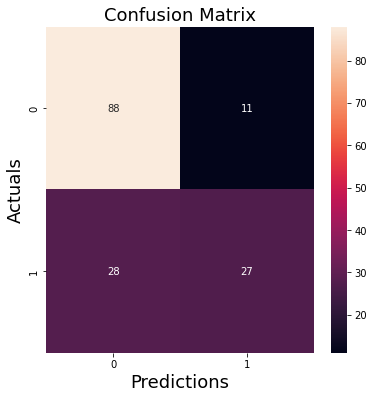

In [20]:

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6, 6))
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)
 
# fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [21]:

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        99
           1       0.71      0.49      0.58        55

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.73       154



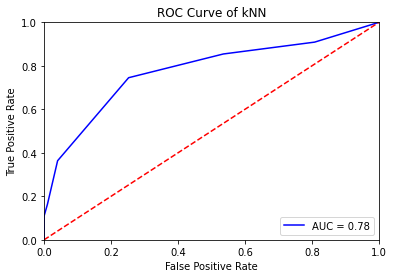

In [22]:

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

y_scores = knn_clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()